In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import scipy


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [4]:
# Define the paths to the dataset
train_dir = r'C:\Users\User\OneDrive\Desktop\jana\Paddy classification\datasets\Paddy train'
test_dir = r'C:\Users\User\OneDrive\Desktop\jana\Paddy classification\datasets\Paddy test'

# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 8631 images belonging to 10 classes.
Found 1776 images belonging to 10 classes.


In [5]:
# Define the number of classes
num_classes = len(train_generator.class_indices)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model with Adam optimizer and a learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100
)


Epoch 1/70


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


269/269 ━━━━━━━━━━━━━━━━━━━━ 128s 461ms/step - accuracy: 0.2191 - loss: 2.1089
Epoch 2/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - accuracy: 0.3125 - loss: 1.9062  
Epoch 3/70


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


269/269 ━━━━━━━━━━━━━━━━━━━━ 122s 448ms/step - accuracy: 0.3187 - loss: 1.9267
Epoch 4/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.3750 - loss: 1.6645   
Epoch 5/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 116s 426ms/step - accuracy: 0.3537 - loss: 1.8316
Epoch 6/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.4062 - loss: 1.9027   
Epoch 7/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 134s 493ms/step - accuracy: 0.3968 - loss: 1.7197
Epoch 8/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.4062 - loss: 1.6124   
Epoch 9/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 131s 481ms/step - accuracy: 0.4042 - loss: 1.6904
Epoch 10/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.2500 - loss: 2.3126   
Epoch 11/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 113s 411ms/step - accuracy: 0.4268 - loss: 1.6351
Epoch 12/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.5312 - loss: 1.4499   
Epoch 13/70
269/269 ━━━━━━━━━━━━━━━━━━━━ 98s 361ms/step - accuracy: 0.4520 - loss: 1.5773
Epoch 14/70
269/26

In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)


55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.5476 - loss: 1.4357
Test accuracy: 0.5460227131843567


In [10]:
# Save the model
model.save('paddy_disease_classifier.h5')


In [14]:
# Load the model
model = load_model(r'C:\Users\User\OneDrive\Desktop\jana\Paddy classification\paddy_disease_classifier.h5')

# Load and preprocess a new image
img_path = r'C:\Users\User\OneDrive\Desktop\jana\Paddy classification\datasets\Paddy test\bacterial_panicle_blight\100058.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
class_labels = list(train_generator.class_indices.keys())
print('Predicted class:', class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: dead_heart


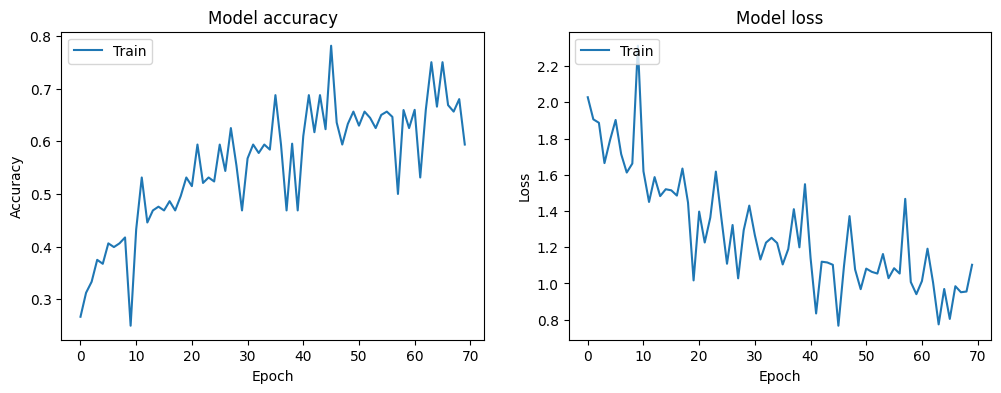

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
